In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
#importing distributions module from the tensorflow_probability library to interact with various distributions
tfd = tfp.distributions
#importing distributions module from the tensorflow_probability library to model data using probabilistic models
tfpl = tfp.layers

In [4]:
#defining a univariate Bernoulli Distributions, setting the probability of getting 1 as 0.9
bernoulli = tfd.Bernoulli(probs =0.9)
bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [5]:
bernoulli.sample(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])>

In [6]:
bernoulli.prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9>

In [7]:
bernoulli.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.105360545>

In [11]:
#defining a multivaritate Bernoulli Distribution
multivariate_bernoulli = tfd.Bernoulli(probs = [[0.3,0.6,0.55],[0.7,0.8,0.49]])
multivariate_bernoulli
#as we see that the batch_shape is (2,3), we can see that all the elements will be sampled from independent distributions

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[2, 3] event_shape=[] dtype=int32>

In [12]:
multivariate_bernoulli.sample(5)

<tf.Tensor: shape=(5, 2, 3), dtype=int32, numpy=
array([[[1, 1, 0],
        [1, 1, 0]],

       [[1, 1, 0],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 0, 0]],

       [[0, 1, 1],
        [0, 0, 0]],

       [[0, 0, 1],
        [0, 0, 0]]])>

In [14]:
multivariate_bernoulli.prob(1) # this simple example will show the broadcasting that takes place in this

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.3       , 0.6       , 0.55      ],
       [0.6999999 , 0.8       , 0.48999998]], dtype=float32)>

In [15]:
multi_bern_sample = multivariate_bernoulli.sample(10)

In [20]:
multivariate_bernoulli.prob(multi_bern_sample[5])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.6999999 , 0.6       , 0.44999996],
       [0.6999999 , 0.8       , 0.51      ]], dtype=float32)>

In [24]:
#using Independent to make an independent distribution a dependent one
ind_bernoulli = tfd.Independent(multivariate_bernoulli,
                               reinterpreted_batch_ndims = 1)
ind_bernoulli
#here you may note the event_shape will shows the dimension of a single random_variable 

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[2] event_shape=[3] dtype=int32>

In [25]:
ind_bernoulli.sample(5)

<tf.Tensor: shape=(5, 2, 3), dtype=int32, numpy=
array([[[0, 0, 0],
        [1, 0, 0]],

       [[1, 1, 1],
        [0, 1, 0]],

       [[0, 1, 1],
        [1, 0, 1]],

       [[0, 1, 0],
        [1, 1, 0]],

       [[0, 0, 1],
        [1, 1, 1]]])>

In [26]:
# In the next step we are going to fit a distribution to a target distribution

In [44]:
target = tfd.Exponential(rate = 0.3)
x_data_samples = target.sample(1000)

In [47]:
target.rate

<tf.Tensor: shape=(), dtype=float32, numpy=0.3>

In [39]:
def nll(x_train, y_):
    return -tf.reduce_mean(y_.log_prob(x_train))

In [40]:
def get_loss_and_grad(x_train,model_data):
    with tf.GradientTape() as tape:
        tape.watch(model_data.trainable_variables)
        loss = nll(x_train,model_data)
        grad = tape.gradient(loss,model_data.trainable_variables)
    return loss,grad    

In [58]:
def train_model(x_data_samples,epochs = 200):
    model_data = tfd.Exponential(rate = tf.Variable(1.0, "prob"))
    print("Initial State of the Model : ", model_data.trainable_variables)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    loss_list = []
    for i in range(1,epochs+1):
        loss,grad = get_loss_and_grad(x_data_samples,model_data)
        optimizer.apply_gradients(zip(grad,model_data.trainable_variables))
        loss_list.append(loss)
        if i%10==0:
            print("iter {} : loss : {}, dist_val : {}".format(i,loss,model_data.rate.value())) 
    plt.plot(loss_list,color = "purple")
    plt.xlabel("epochs")
    plt.ylabel("loss-value")
    plt.show()

Initial State of the Model :  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,)
iter 10 : loss : 3.318767786026001, dist_val : 0.9001405835151672
iter 20 : loss : 3.082897663116455, dist_val : 0.8011558055877686
iter 30 : loss : 2.865964412689209, dist_val : 0.7041050791740417
iter 40 : loss : 2.673837900161743, dist_val : 0.6103482842445374
iter 50 : loss : 2.513192653656006, dist_val : 0.5217253565788269
iter 60 : loss : 2.3909175395965576, dist_val : 0.44085684418678284
iter 70 : loss : 2.3119239807128906, dist_val : 0.3714573085308075
iter 80 : loss : 2.2743706703186035, dist_val : 0.31820040941238403
iter 90 : loss : 2.2651641368865967, dist_val : 0.2850550711154938
iter 100 : loss : 2.26562762260437, dist_val : 0.271759957075119
iter 110 : loss : 2.265716552734375, dist_val : 0.27206072211265564
iter 120 : loss : 2.265183687210083, dist_val : 0.27738651633262634
iter 130 : loss : 2.265000820159912, dist_val : 0.2818686068058014
iter 140 : loss : 2.2650094032287598, 

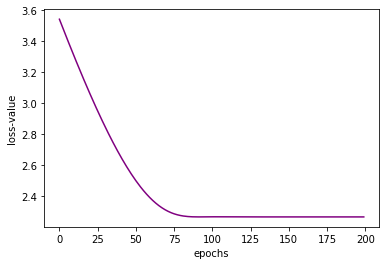

In [59]:
train_model(x_data_samples)

In [61]:
#testing network on other-distribution

In [105]:
multivariate = tfd.Normal(loc = 3,scale = 4)
print(multivariate)
samples = multivariate.sample(5000)
print(samples.shape)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
(5000,)


In [97]:
init_distribution.log_prob(samples[0])

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [64]:
def nll(x_train, y_):
    return -tf.reduce_mean(y_.log_prob(x_train))

In [120]:
def get_loss_and_grad(x_train,model_data):
    with tf.GradientTape() as tape:
        tape.watch(model_data.trainable_variables)
        loss = nll(x_train,model_data)
        grad = tape.gradient(loss,model_data.trainable_variables)
    return loss,grad    

In [121]:
def train_model(x_data_samples,dist,epochs = 200):
    model_data = dist
    print("Initial State of the Model : ", model_data.trainable_variables)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    loss_list = []
    for i in range(1,epochs+1):
        loss,grad = get_loss_and_grad(x_data_samples,model_data)
        optimizer.apply_gradients(zip(grad,model_data.trainable_variables))
        loss_list.append(loss)
        if i%10==0:
            print("iter {} : loss : {}".format(i,loss)) 
    plt.plot(loss_list,color = "purple")
    plt.xlabel("epochs")
    plt.ylabel("loss-value")
    plt.show()
    print(model_data.trainable_variables)
    return model_data

In [124]:
init_distribution = tfd.Normal(loc = tf.Variable(1.0,name= "loc"),scale = 4.)

Initial State of the Model :  (<tf.Variable 'loc:0' shape=() dtype=float32, numpy=1.0>,)
iter 10 : loss : 2.916611671447754
iter 20 : loss : 2.905116081237793
iter 30 : loss : 2.8944051265716553
iter 40 : loss : 2.8845081329345703
iter 50 : loss : 2.8754215240478516
iter 60 : loss : 2.8671209812164307
iter 70 : loss : 2.8595712184906006
iter 80 : loss : 2.852731227874756
iter 90 : loss : 2.846557855606079
iter 100 : loss : 2.8410074710845947
iter 110 : loss : 2.8360373973846436
iter 120 : loss : 2.83160400390625
iter 130 : loss : 2.8276660442352295
iter 140 : loss : 2.824183225631714
iter 150 : loss : 2.8211159706115723
iter 160 : loss : 2.8184268474578857
iter 170 : loss : 2.8160805702209473
iter 180 : loss : 2.81404185295105
iter 190 : loss : 2.81227970123291
iter 200 : loss : 2.810763359069824
iter 210 : loss : 2.8094654083251953
iter 220 : loss : 2.808359384536743
iter 230 : loss : 2.807422161102295
iter 240 : loss : 2.806631565093994
iter 250 : loss : 2.8059682846069336
iter 260 :

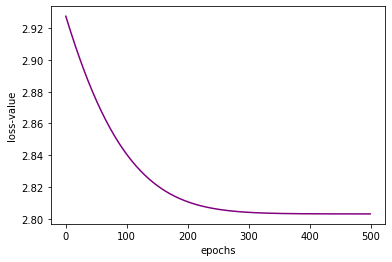

(<tf.Variable 'loc:0' shape=() dtype=float32, numpy=2.985529>,)


In [125]:
learned_distribution = train_model(samples,init_distribution,500)